#### "KDD CUP 99" is the dataset used in the 3rd International Knowledge Discovery and Data Mining Tool Competition held concurrently with the 5th KDD99. It is taken from the DARPA98 dataset. after extracting and pre-processing the data. The DARPA98 dataset collects TCPdump network connections and system test data from  a US Air Force LAN simulation lab over a 9-week period. The raw data collected by this TCPdumps is divided into two parts: The 7-week training data  contains about 5,000,000 network connections. The record, the remaining 2 weeks of test data contains about 2,000,000 network connection records. Wende Lee et al. performed feature analysis and data pre-processing on the data from the DARPA98 dataset, removed some duplicate data, and obtained the KDD99 dataset. The KDD99 dataset includes a total of 5 million records  and it also provides  10% of the training and testing subsets. In the data set, each network connection is marked as normal (normal) or abnormal (attack) and the abnormal type  is divided into 4 categories with a total of 39 attack types, including 22 types of attacks that occur. in the training set and 17 unknown types. Attack patterns appear in the test set. The 4 exception types are: 
1. DOS, or denial of service attack. For example: pingofdeath, flood syn, smurf, etc. ; 
2. R2L, i.e. unauthorized access from  remote server. Password guessing example; 
3. U2R, Unauthorized Super Local  User Privilege Access. such as buffer overflow attacks; 
4. PROBING, or monitor or scan ports. For example portcan, pingsweep, etc. In the KDD99 dataset, records are written in csv format, and each connection is described by 41 characteristics, plus the final label (label), making a total of 42 elements. The first 41 characteristics are divided into 4 categories: TCP connection basic characteristics (9 items), TCP connection content characteristics (13 items), time-based network traffic statistics characteristics (9 items). ) and host-based network traffic statistics characteristics (10 items).

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)
seed = 0

/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
/kaggle/input/kdd-cup-1999-data/corrected.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.names
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
/kaggle/input/kdd-cup-1999-data/typo-correction.txt
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
/kaggle/input/kdd-cup-1999-data/corrected/corrected
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kd

In [2]:
# 10% data file
data = pd.read_csv('/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected', header=None)

#### Columns

In [3]:
data.columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
    'logged_in',
    'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login','count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome'
]

In [4]:
data.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
468339,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.08,0.0,0.00,0.0,0.0,1.0,1.0,neptune.
355973,0,tcp,private,S0,0,0,0,0,0,0,...,7,0.03,0.06,0.0,0.00,1.0,1.0,0.0,0.0,neptune.
462156,0,tcp,private,REJ,0,0,0,0,0,0,...,11,0.04,0.08,0.0,0.00,0.0,0.0,1.0,1.0,neptune.
413173,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
166563,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
229820,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
441433,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
252206,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
290365,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
343897,0,tcp,http,REJ,0,0,0,0,0,0,...,255,1.00,0.00,1.0,0.22,0.0,0.0,1.0,1.0,normal.


In [5]:
print(data['num_outbound_cmds'].unique())

[0]


In [6]:
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [7]:
encode_numeric_zscore(data, 'duration')
encode_text_dummy(data, 'protocol_type')
encode_text_dummy(data, 'service')
encode_text_dummy(data, 'flag')
encode_numeric_zscore(data, 'src_bytes')
encode_numeric_zscore(data, 'dst_bytes')
encode_text_dummy(data, 'land')
encode_numeric_zscore(data, 'wrong_fragment')
encode_numeric_zscore(data, 'urgent')
encode_numeric_zscore(data, 'hot')
encode_numeric_zscore(data, 'num_failed_logins')
encode_text_dummy(data, 'logged_in')
encode_numeric_zscore(data, 'num_compromised')
encode_numeric_zscore(data, 'root_shell')
encode_numeric_zscore(data, 'su_attempted')
encode_numeric_zscore(data, 'num_root')
encode_numeric_zscore(data, 'num_file_creations')
encode_numeric_zscore(data, 'num_shells')
encode_numeric_zscore(data, 'num_access_files')
encode_numeric_zscore(data, 'num_outbound_cmds')
encode_text_dummy(data, 'is_host_login')
encode_text_dummy(data, 'is_guest_login')
encode_numeric_zscore(data, 'count')
encode_numeric_zscore(data, 'srv_count')
encode_numeric_zscore(data, 'serror_rate')
encode_numeric_zscore(data, 'srv_serror_rate')
encode_numeric_zscore(data, 'rerror_rate')
encode_numeric_zscore(data, 'srv_rerror_rate')
encode_numeric_zscore(data, 'same_srv_rate')
encode_numeric_zscore(data, 'diff_srv_rate')
encode_numeric_zscore(data, 'srv_diff_host_rate')
encode_numeric_zscore(data, 'dst_host_count')
encode_numeric_zscore(data, 'dst_host_srv_count')
encode_numeric_zscore(data, 'dst_host_same_srv_rate')
encode_numeric_zscore(data, 'dst_host_diff_srv_rate')
encode_numeric_zscore(data, 'dst_host_same_src_port_rate')
encode_numeric_zscore(data, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(data, 'dst_host_serror_rate')
encode_numeric_zscore(data, 'dst_host_srv_serror_rate')
encode_numeric_zscore(data, 'dst_host_rerror_rate')
encode_numeric_zscore(data, 'dst_host_srv_rerror_rate')

data.dropna(inplace=True, axis=1)

In [8]:
data.outcome.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: outcome, dtype: int64

In [9]:
x_columns = data.columns.drop('outcome')
x = data[x_columns].values
dummies = pd.get_dummies(data['outcome']) #分类
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed)

In [11]:
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, ELU, Input, Dropout

input = Input(shape=x.shape[1])

m = Dense(64)(input) 
m = ELU()(m)
m = Dropout(0.33)(m) 

m = Dense(64)(m)
m = ELU()(m)
m = Dropout(0.33)(m)

m = Dense(32)(m)
m = ELU()(m)
m = Dropout(0.33)(m)

m = Dense(16)(m)
m = ELU()(m)
m = Dropout(0.33)(m)

# m = Dense(1, activation='linear')(m)

output = Dense(y.shape[1], activation='softmax')(m)

model = Model(inputs=[input], outputs=[output])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                7744      
_________________________________________________________________
elu (ELU)                    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
elu_1 (ELU)                  (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0     

2022-04-11 07:02:59.179390: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 07:02:59.284913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 07:02:59.285761: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 07:02:59.288098: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)

rlp = ReduceLROnPlateau(monitor='val_loss', patience=9, verbose=1, factor=0.5, cooldown=5, min_lr=1e-10)

In [13]:
history = model.fit(x_train
                    ,y_train
#                     ,validation_data=(x_test,y_test)
                    ,callbacks=[es, rlp]
                    ,verbose=1
                    ,epochs=30
                    , batch_size=512).history

2022-04-11 07:03:02.117569: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
724/724 [==============================] - 4s 3ms/step - loss: 0.0786 - acc: 0.8317
Epoch 2/30
724/724 [==============================] - 2s 3ms/step - loss: 0.0122 - acc: 0.9607
Epoch 3/30
724/724 [==============================] - 2s 3ms/step - loss: 0.0090 - acc: 0.9677
Epoch 4/30
724/724 [==============================] - 2s 3ms/step - loss: 0.0072 - acc: 0.9724
Epoch 5/30
724/724 [==============================] - 2s 3ms/step - loss: 0.0062 - acc: 0.9764
Epoch 6/30
724/724 [==============================] - 2s 3ms/step - loss: 0.0056 - acc: 0.9789
Epoch 7/30
724/724 [==============================] - 2s 3ms/step - loss: 0.0052 - acc: 0.9802
Epoch 8/30
724/724 [==============================] - 2s 3ms/step - loss: 0.0049 - acc: 0.9814
Epoch 9/30
724/724 [==============================] - 2s 3ms/step - loss: 0.0046 - acc: 0.9824
Epoch 10/30
724/724 [==============================] - 2s 3ms/step - loss: 0.0044 - acc: 0.9828
Epoch 11/30
724/724 [============================

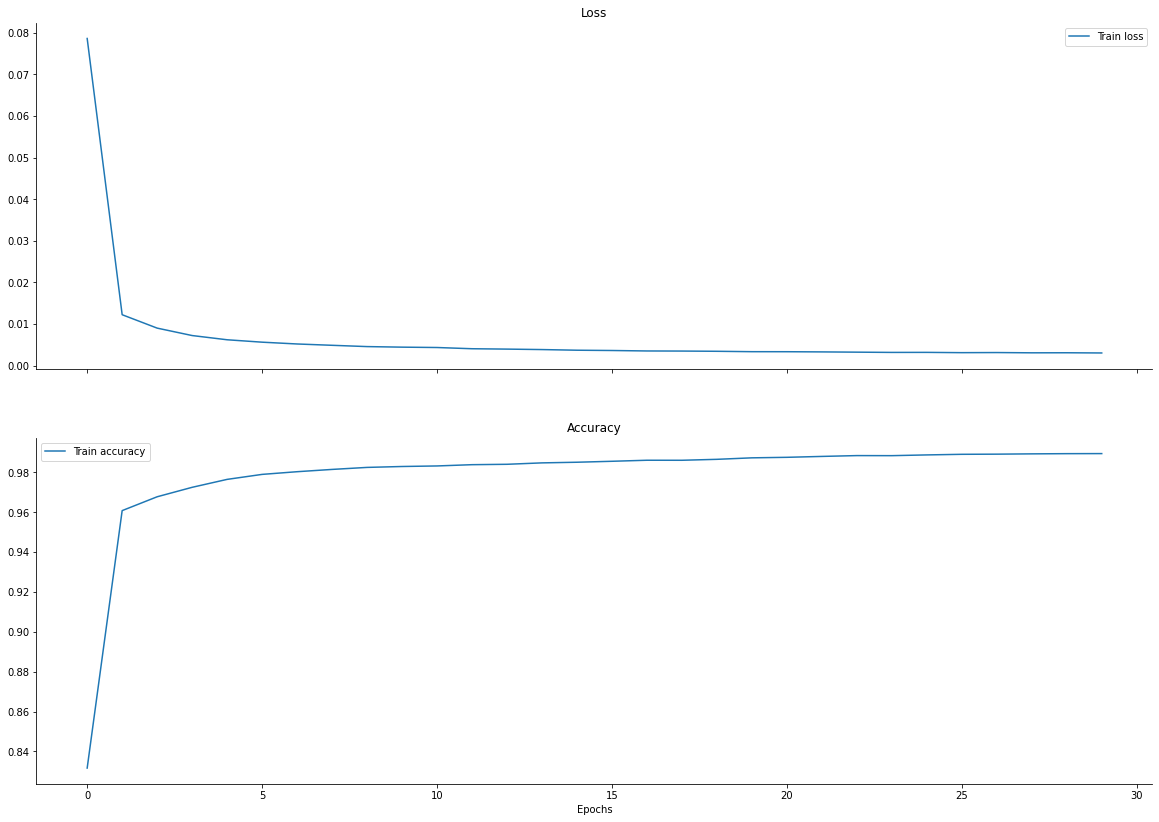

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

ax1.plot(history['loss'], label='Train loss')
# ax1.plot(history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history['acc'], label='Train accuracy')
# ax2.plot(history['val_acc'], label='Validation accuracy')
ax2.legend(loc='best')
ax2.set_title('Accuracy')

plt.xlabel('Epochs')
sns.despine()
plt.show()

In [15]:
model.evaluate(x_test, y_test)

3860/3860 [==============================] - 7s 2ms/step - loss: 0.0018 - acc: 0.9957


[0.0017646526684984565, 0.9957249164581299]

In [16]:
x_test

array([[-0.06637872, -0.0020275 , -0.01451369, ...,  1.        ,
         1.        ,  0.        ],
       [-0.06779165, -0.0026812 , -0.01766139, ...,  1.        ,
         1.        ,  0.        ],
       [-0.06779165, -0.00201738, -0.0262873 , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.06779165, -0.00201738, -0.0262873 , ...,  1.        ,
         1.        ,  0.        ],
       [-0.06779165, -0.00283602,  0.13312553, ...,  1.        ,
         1.        ,  0.        ],
       [-0.06779165, -0.00201738, -0.0262873 , ...,  1.        ,
         1.        ,  0.        ]])